### Model Training

#### 1. Prophet
###### - With Seasonality (Weekly and Monthly)
###### - With Holiday effects of India. 

### for a single pizza category

In [37]:
from prophet import Prophet
import pandas as pd

In [38]:
df = pd.read_excel("dataset.xlsx")
df
model_df = pd.DataFrame(df[['order_date','formatted_date','quantity','pizza_name_id']]).rename(columns={"order_date":"ds","quantity":"y"})
#model_df['ds'] = model_df['ds'] .dt.strftime('%d-%m-%Y')
model_df


,ds,formatted_date,y,pizza_name_id
0,2015-01-01,01 Jan 2015,1,hawaiian_m
1,2015-01-01,01 Jan 2015,1,peppr_salami_m
2,2015-01-01,01 Jan 2015,1,ckn_alfredo_m
3,2015-01-01,01 Jan 2015,1,ital_supr_m
4,2015-01-01,01 Jan 2015,1,peppr_salami_l
...,...,...,...,...
48615,2015-12-31,31 Dec 2015,1,spicy_ital_l
48616,2015-12-31,31 Dec 2015,1,calabrese_l
48617,2015-12-31,31 Dec 2015,1,classic_dlx_m
48618,2015-12-31,31 Dec 2015,1,mediterraneo_s


In [39]:
model_df['ds'] = model_df['ds'].dt.date
start_date =pd.to_datetime('2015-09-30').date()
train_df = model_df.loc[model_df['ds'] <= start_date]
test_df = model_df.loc[model_df['ds']> start_date]
test_df

,ds,formatted_date,y,pizza_name_id
36727,2015-10-01,01 Oct 2015,1,peppr_salami_s
36728,2015-10-01,01 Oct 2015,1,peppr_salami_l
36729,2015-10-01,01 Oct 2015,1,southw_ckn_m
36730,2015-10-01,01 Oct 2015,1,ital_cpcllo_m
36731,2015-10-01,01 Oct 2015,1,mexicana_l
...,...,...,...,...
48615,2015-12-31,31 Dec 2015,1,spicy_ital_l
48616,2015-12-31,31 Dec 2015,1,calabrese_l
48617,2015-12-31,31 Dec 2015,1,classic_dlx_m
48618,2015-12-31,31 Dec 2015,1,mediterraneo_s


In [40]:
pizzas = train_df['pizza_name_id'].unique()[0]
pizzas

'hawaiian_m'

In [41]:

train_df_ =train_df.loc[train_df['pizza_name_id'] == pizzas]

train_df_
aggregated_sales = train_df_.groupby(by='ds', as_index=False).sum()
train = pd.DataFrame(aggregated_sales[['ds','y']])
train

,ds,y
0,2015-01-01,1
1,2015-01-02,1
2,2015-01-04,1
3,2015-01-05,2
4,2015-01-06,1
...,...,...
194,2015-09-21,2
195,2015-09-23,2
196,2015-09-26,2
197,2015-09-29,1


In [42]:

test_df_ =test_df.loc[test_df['pizza_name_id'] == pizzas]
test_df_
aggregated_sales = test_df_.groupby(by='ds', as_index=False).sum()
test = pd.DataFrame(aggregated_sales[['ds','y']])
test

,ds,y
0,2015-10-01,1
1,2015-10-02,1
2,2015-10-03,2
3,2015-10-04,1
4,2015-10-05,2
...,...,...
66,2015-12-23,1
67,2015-12-24,1
68,2015-12-26,1
69,2015-12-27,1


In [43]:

model = Prophet(weekly_seasonality=True,yearly_seasonality=False)
model.add_country_holidays(country_name="IN")
model.train_holiday_names
model.add_seasonality(name="monthly" , period =30.5,fourier_order=5)
model
model.fit(train)
model.train_holiday_names

c:\Doughmate\my-env\Lib\site-packages\holidays\countries\india.py:103: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)
07:20:19 - cmdstanpy - INFO - Chain [1] start processing
07:20:19 - cmdstanpy - INFO - Chain [1] done processing


0      Makar Sankranti / Pongal
1                  Republic Day
2              Independence Day
3                Gandhi Jayanti
4                    Labour Day
5                        Diwali
6                          Holi
7     Day of Ashura (estimated)
8            Mawlid (estimated)
9       Eid ul-Fitr (estimated)
10      Eid al-Adha (estimated)
11                  Palm Sunday
12                  Good Friday
13                Easter Sunday
14           Feast of Pentecost
15                Christmas Day
dtype: object

In [44]:
future =model.make_future_dataframe(periods= 98)
future.dtypes


ds    datetime64[ns]
dtype: object

In [45]:
pred =model.predict(future)
pred
#pred.to_excel("pred.xlsx")

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Day of Ashura (estimated),...,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,1.713180,0.742349,3.120831,1.713180,1.713180,0.0,0.0,0.0,0.0,...,0.300685,0.300685,0.300685,-0.071850,-0.071850,-0.071850,0.0,0.0,0.0,1.942015
1,2015-01-02,1.713889,0.785099,3.266935,1.713889,1.713889,0.0,0.0,0.0,0.0,...,0.334482,0.334482,0.334482,-0.074973,-0.074973,-0.074973,0.0,0.0,0.0,1.973397
2,2015-01-04,1.715306,0.519990,2.933839,1.715306,1.715306,0.0,0.0,0.0,0.0,...,0.153502,0.153502,0.153502,-0.141247,-0.141247,-0.141247,0.0,0.0,0.0,1.727561
3,2015-01-05,1.716015,0.688319,3.012089,1.716015,1.716015,0.0,0.0,0.0,0.0,...,0.121327,0.121327,0.121327,0.023908,0.023908,0.023908,0.0,0.0,0.0,1.861250
4,2015-01-06,1.716723,0.952532,3.435861,1.716723,1.716723,0.0,0.0,0.0,0.0,...,0.131915,0.131915,0.131915,0.319574,0.319574,0.319574,0.0,0.0,0.0,2.168212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,2016-01-02,1.976964,1.122160,3.533497,1.976833,1.977096,0.0,0.0,0.0,0.0,...,0.300685,0.300685,0.300685,0.042870,0.042870,0.042870,0.0,0.0,0.0,2.320519
293,2016-01-03,1.977685,0.941032,3.370544,1.977552,1.977820,0.0,0.0,0.0,0.0,...,0.334482,0.334482,0.334482,-0.141247,-0.141247,-0.141247,0.0,0.0,0.0,2.170920
294,2016-01-04,1.978406,1.008099,3.472009,1.978271,1.978544,0.0,0.0,0.0,0.0,...,0.248365,0.248365,0.248365,0.023908,0.023908,0.023908,0.0,0.0,0.0,2.250679
295,2016-01-05,1.979127,1.233188,3.627946,1.978990,1.979268,0.0,0.0,0.0,0.0,...,0.153502,0.153502,0.153502,0.319574,0.319574,0.319574,0.0,0.0,0.0,2.452203


In [46]:
from prophet .diagnostics import performance_metrics
from prophet.diagnostics import cross_validation

# Cross-validation
df_cv = cross_validation(model, 
                         initial='180 days',  # Reduced training period
                         period='45 days',    # Predictions every 10 days
                         horizon='90 days',   # Predict 20 days into the future
                         parallel="processes")

df_p = performance_metrics(df_cv)
print(df_p.head())

  horizon       mse      rmse       mae      mape     mdape     smape  \
0  6 days  0.568056  0.753695  0.657773  0.448954  0.356601  0.357832   
1  7 days  0.424956  0.651886  0.543258  0.311000  0.257700  0.274302   
2  9 days  0.464854  0.681802  0.586898  0.381825  0.356601  0.324907   
3 10 days  0.363760  0.603125  0.497424  0.292351  0.324406  0.269904   
4 11 days  0.467052  0.683412  0.623504  0.421047  0.356601  0.361510   

   coverage  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0  


### for Given dataset

In [47]:
model_df

,ds,formatted_date,y,pizza_name_id
0,2015-01-01,01 Jan 2015,1,hawaiian_m
1,2015-01-01,01 Jan 2015,1,peppr_salami_m
2,2015-01-01,01 Jan 2015,1,ckn_alfredo_m
3,2015-01-01,01 Jan 2015,1,ital_supr_m
4,2015-01-01,01 Jan 2015,1,peppr_salami_l
...,...,...,...,...
48615,2015-12-31,31 Dec 2015,1,spicy_ital_l
48616,2015-12-31,31 Dec 2015,1,calabrese_l
48617,2015-12-31,31 Dec 2015,1,classic_dlx_m
48618,2015-12-31,31 Dec 2015,1,mediterraneo_s


In [48]:
start_date =pd.to_datetime('2015-11-30').date()
training_data = model_df.loc[model_df['ds'] <= start_date]
val_data = model_df.loc[model_df['ds']> start_date]
training_data

,ds,formatted_date,y,pizza_name_id
0,2015-01-01,01 Jan 2015,1,hawaiian_m
1,2015-01-01,01 Jan 2015,1,peppr_salami_m
2,2015-01-01,01 Jan 2015,1,ckn_alfredo_m
3,2015-01-01,01 Jan 2015,1,ital_supr_m
4,2015-01-01,01 Jan 2015,1,peppr_salami_l
...,...,...,...,...
44993,2015-11-30,30 Nov 2015,1,bbq_ckn_s
44994,2015-11-30,30 Nov 2015,1,spin_pesto_s
44995,2015-11-30,30 Nov 2015,1,spicy_ital_m
44996,2015-11-30,30 Nov 2015,1,spicy_ital_l


In [49]:
val_data

,ds,formatted_date,y,pizza_name_id
44998,2015-12-01,01 Dec 2015,1,spinach_fet_m
44999,2015-12-01,01 Dec 2015,1,peppr_salami_m
45000,2015-12-01,01 Dec 2015,1,bbq_ckn_l
45001,2015-12-01,01 Dec 2015,1,bbq_ckn_l
45002,2015-12-01,01 Dec 2015,1,spin_pesto_s
...,...,...,...,...
48615,2015-12-31,31 Dec 2015,1,spicy_ital_l
48616,2015-12-31,31 Dec 2015,1,calabrese_l
48617,2015-12-31,31 Dec 2015,1,classic_dlx_m
48618,2015-12-31,31 Dec 2015,1,mediterraneo_s


In [50]:
import numpy as np
def wmape(y_true, y_pred):
    w= np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()
    return w/10

In [51]:
import joblib
from joblib import Parallel, delayed
from prophet.diagnostics import mape
fam =training_data['pizza_name_id'].unique()

for family in fam[:2]:
    print('family:', family)
    train_ = training_data.loc[training_data['pizza_name_id'] == family]
    valid_ = val_data.loc[val_data['pizza_name_id'] == family]
    
    
    model_prophet = Prophet(seasonality_mode='additive', yearly_seasonality=False, 
                weekly_seasonality=True,
                )
    model_prophet.add_country_holidays(country_name="IN")
    model_prophet.fit(train_)
    
    future = model_prophet.make_future_dataframe(periods=90, include_history=False)
    #print("future",future)
    future['ds'] = future['ds'].dt.date
    #valid_['ds'] = valid_['ds'].dt.date
    future = future.merge(valid_[['ds']], on='ds', how='left')
    #print("f2>>",future)


    forecast = model_prophet.predict(future)
    print("fore>>>>>",forecast['ds'])
    
    forecast['pizza_name_id'] = family
    #print(forecast[['ds', 'yhat', 'pizza_name_id']])
    


family: hawaiian_m


c:\Doughmate\my-env\Lib\site-packages\holidays\countries\india.py:103: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)
07:20:23 - cmdstanpy - INFO - Chain [1] start processing
07:20:23 - cmdstanpy - INFO - Chain [1] done processing
c:\Doughmate\my-env\Lib\site-packages\holidays\countries\india.py:103: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)
07:20:23 - cmdstanpy - INFO - Chain [1] start processing
07:20:23 - cmdstanpy - INFO - Chain [1] done processing


fore>>>>> 0     2015-12-01
1     2015-12-02
2     2015-12-02
3     2015-12-02
4     2015-12-03
         ...    
97    2016-02-24
98    2016-02-25
99    2016-02-26
100   2016-02-27
101   2016-02-28
Name: ds, Length: 102, dtype: datetime64[ns]
family: peppr_salami_m
fore>>>>> 0     2015-12-01
1     2015-12-01
2     2015-12-02
3     2015-12-03
4     2015-12-04
         ...    
96    2016-02-24
97    2016-02-25
98    2016-02-26
99    2016-02-27
100   2016-02-28
Name: ds, Length: 101, dtype: datetime64[ns]


In [52]:
import joblib
from joblib import Parallel, delayed
from prophet.serialize import model_to_json, model_from_json
from prophet.diagnostics import mape

def run_one(train, valid, family):
    periods= 30
    print('family:', family)
    train = training_data.loc[training_data['pizza_name_id'] == family]
    train_ = train.groupby(['ds', 'pizza_name_id']).agg({'y': 'sum'}).reset_index()
    
    valid = val_data.loc[val_data['pizza_name_id'] == family]
    
    valid_=valid.groupby(['ds', 'pizza_name_id']).agg({'y': 'sum'}).reset_index()
 
    

    
    
    model_prophet = Prophet(seasonality_mode='additive', yearly_seasonality=False, 
                weekly_seasonality=True,
                )
    model_prophet.add_country_holidays(country_name="IN")
    model_prophet.fit(train_)
    with open(f'./models/prophet_{family}.json', 'w') as f:
        f.write(model_to_json(model_prophet))
    
    future = model_prophet.make_future_dataframe(periods=periods, include_history=False)
    print("future",future)
    future['ds'] = future['ds'].dt.date
    #valid_['ds'] = valid_['ds'].dt.date
    future = future.merge(valid_[['ds']], on='ds', how='left')


    forecast = model_prophet.predict(future)
    
    forecast['pizza_name_id'] = family
    forecast['ds'] = forecast['ds'].dt.date
    return(forecast[['ds', 'yhat', 'pizza_name_id']])
    


In [53]:
jobs = list()
for family in training_data['pizza_name_id'].unique():
    train_df = training_data.loc[training_data['pizza_name_id'] == family]
    valid_df = val_data.loc[val_data['pizza_name_id'] == family]
    jobs.append(delayed(run_one)(train_df , valid_df , family))

In [54]:
p = Parallel(n_jobs=10)(jobs)
p = pd.concat(p, ignore_index=True)
p['yhat'] = p['yhat'].clip(lower=0)

ag_val=val_data.groupby(['ds']).agg({'y': 'sum'}).reset_index()

co= ag_val['y'].isnull().sum()

p=p.groupby(['ds']).agg({'yhat': 'sum'}).reset_index()

print("P>>>>>>>>>",p)

#print("Unmatched ds values:\n", unmatched_ds)
#print("Unmatched pizza_name_id values:\n", unmatched_pizza_name_id)




res=wmape(ag_val['y'], p['yhat'])
print("WMAPE>>>>",res)

P>>>>>>>>>             ds        yhat
0   2015-11-20    1.000000
1   2015-11-21    1.000000
2   2015-11-22    1.000000
3   2015-11-23    1.000000
4   2015-11-24    1.000000
5   2015-11-25    1.000000
6   2015-11-26    1.000000
7   2015-11-27    2.075848
8   2015-11-28    7.841949
9   2015-11-29   23.071071
10  2015-11-30   51.876471
11  2015-12-01  181.159191
12  2015-12-02  180.154563
13  2015-12-03  189.588802
14  2015-12-04  199.688405
15  2015-12-05  186.440717
16  2015-12-06  169.561060
17  2015-12-07  179.494042
18  2015-12-08  181.170622
19  2015-12-09  180.165994
20  2015-12-10  189.600233
21  2015-12-11  199.699836
22  2015-12-12  186.452148
23  2015-12-13  169.572491
24  2015-12-14  179.505473
25  2015-12-15  181.182053
26  2015-12-16  180.177425
27  2015-12-17  189.611663
28  2015-12-18  199.711267
29  2015-12-19  186.463579
30  2015-12-20  168.583922
31  2015-12-21  178.516903
32  2015-12-22  180.193484
33  2015-12-23  161.672610
34  2015-12-24  188.623094
35  2015-12-25  1

In [55]:
start=pd.to_datetime('2015-12-01').date()
start
p =pd.DataFrame(p[p['ds'] >= start])
p

,ds,yhat
11,2015-12-01,181.159191
12,2015-12-02,180.154563
13,2015-12-03,189.588802
14,2015-12-04,199.688405
15,2015-12-05,186.440717
16,2015-12-06,169.561060
17,2015-12-07,179.494042
18,2015-12-08,181.170622
19,2015-12-09,180.165994
20,2015-12-10,189.600233


In [56]:
ag_val

,ds,y
0,2015-12-01,119
1,2015-12-02,130
2,2015-12-03,119
3,2015-12-04,120
4,2015-12-05,142
5,2015-12-06,131
6,2015-12-07,128
7,2015-12-08,144
8,2015-12-09,156
9,2015-12-11,153


In [57]:
wmape(ag_val['y'],p['yhat'])

np.float64(0.030000375090842447)

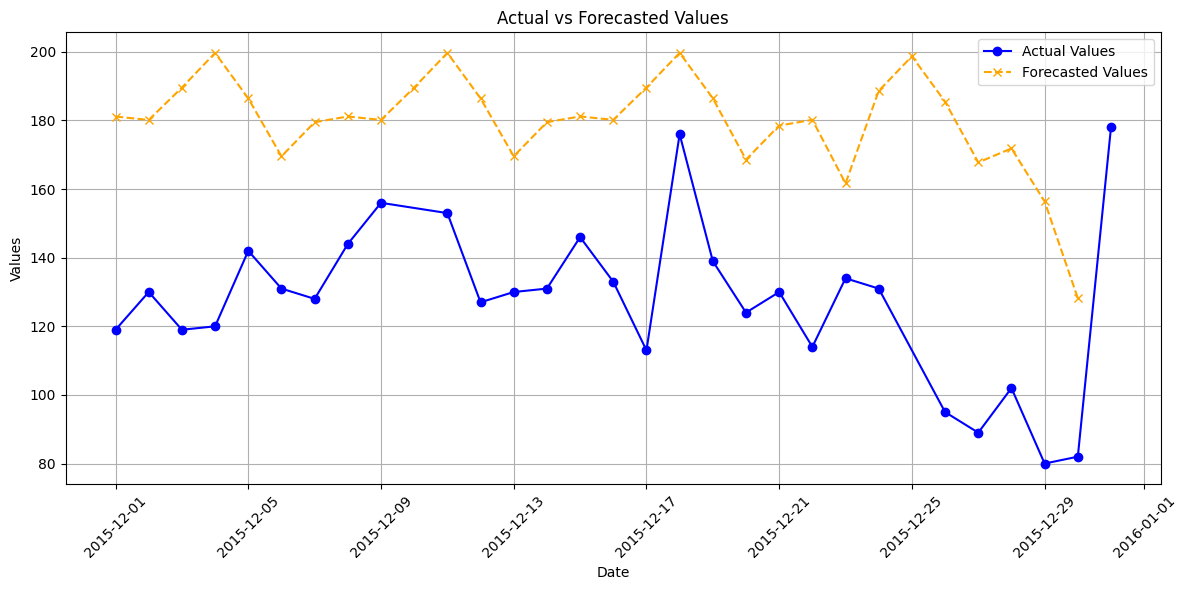

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(ag_val['ds'], ag_val['y'], label='Actual Values', color='blue', marker='o')
plt.plot(p['ds'], p['yhat'], label='Forecasted Values', color='orange', linestyle='--', marker='x')

# Adding titles and labels
plt.title('Actual vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show plot
plt.show()

### ARIMA Modle

In [59]:
import pandas as pd
import numpy as np
df = pd.read_excel("dataset.xlsx",parse_dates=True)

df

,order_date,formatted_date,pizza_name_id,quantity,unit_price,order_day,order_month,order_year,order_hour
0,2015-01-01,01 Jan 2015,hawaiian_m,1,13.25,Thursday,January,2015,11
1,2015-01-01,01 Jan 2015,peppr_salami_m,1,16.50,Thursday,January,2015,17
2,2015-01-01,01 Jan 2015,ckn_alfredo_m,1,16.75,Thursday,January,2015,17
3,2015-01-01,01 Jan 2015,ital_supr_m,1,16.50,Thursday,January,2015,17
4,2015-01-01,01 Jan 2015,peppr_salami_l,1,20.75,Thursday,January,2015,17
...,...,...,...,...,...,...,...,...,...
48615,2015-12-31,31 Dec 2015,spicy_ital_l,1,20.75,Thursday,December,2015,15
48616,2015-12-31,31 Dec 2015,calabrese_l,1,20.25,Thursday,December,2015,16
48617,2015-12-31,31 Dec 2015,classic_dlx_m,1,16.00,Thursday,December,2015,16
48618,2015-12-31,31 Dec 2015,mediterraneo_s,1,12.00,Thursday,December,2015,15


#### Check For Stationarity

In [60]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [61]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
def select_arima(series):
    stepwise_fit = auto_arima(series, 
                            suppress_warnings=True)           

    stepwise_fit.summary()
    return stepwise_fit.order()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [252]:
import joblib
from joblib import Parallel, delayed
from prophet.serialize import model_to_json, model_from_json
from prophet.diagnostics import mape

def run_one(train, valid, family):
   
    print('family:', family)
   
    train_ = train.groupby(['order_date', 'pizza_name_id']).agg({'quantity': 'sum'}).reset_index()
 
    
    valid_=valid.groupby(['order_date', 'pizza_name_id']).agg({'quantity': 'sum'}).reset_index()
   
    total_df = pd.concat([train_ , valid_])
    adf_test(total_df['quantity'])
    arima_order = select_arima(total_df['quantity'])
    print("ORDER>>>",arima_order)
    
    
    
    


In [247]:
start_date =pd.to_datetime('2015-11-30')
train = df.loc[df['order_date'] <= start_date]
test = df.loc[df['order_date']> start_date]
train
test

,order_date,formatted_date,pizza_name_id,quantity,unit_price,order_day,order_month,order_year,order_hour
44998,2015-12-01,01 Dec 2015,spinach_fet_m,1,16.00,Tuesday,December,2015,17
44999,2015-12-01,01 Dec 2015,peppr_salami_m,1,16.50,Tuesday,December,2015,17
45000,2015-12-01,01 Dec 2015,bbq_ckn_l,1,20.75,Tuesday,December,2015,17
45001,2015-12-01,01 Dec 2015,bbq_ckn_l,1,20.75,Tuesday,December,2015,18
45002,2015-12-01,01 Dec 2015,spin_pesto_s,1,12.50,Tuesday,December,2015,18
...,...,...,...,...,...,...,...,...,...
48615,2015-12-31,31 Dec 2015,spicy_ital_l,1,20.75,Thursday,December,2015,15
48616,2015-12-31,31 Dec 2015,calabrese_l,1,20.25,Thursday,December,2015,16
48617,2015-12-31,31 Dec 2015,classic_dlx_m,1,16.00,Thursday,December,2015,16
48618,2015-12-31,31 Dec 2015,mediterraneo_s,1,12.00,Thursday,December,2015,15


In [251]:
# for single pizza family
family = "hawaiian_m"
train_df = train.loc[train['pizza_name_id'] == family]
test_df = test.loc[test['pizza_name_id'] == family]
run_one(train_df,test_df,family)

family: hawaiian_m
1. ADF :  -16.257950515661324
2. P-Value :  3.5900019887695464e-29
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 269
5. Critical Values :
	 1% :  -3.4548957220044336
	 5% :  -2.8723451788613157
	 10% :  -2.572527778361272


In [ ]:
jobs = list()
for family in training_data['pizza_name_id'].unique():
    train_df = training_data.loc[training_data['pizza_name_id'] == family]
    valid_df = val_data.loc[val_data['pizza_name_id'] == family]
    jobs.append(delayed(run_one)(train_df , valid_df , family))

In [ ]:
p = Parallel(n_jobs=10)(jobs)
p = pd.concat(p, ignore_index=True)
p['yhat'] = p['yhat'].clip(lower=0)

ag_val=val_data.groupby(['ds', 'pizza_name_id']).agg({'y': 'sum'}).reset_index()
#ag_val=pd.DataFrame(ag_val[ag_val['pizza_name_id']  =="hawaiian_m"])
#p =pd.DataFrame(p[p['pizza_name_id']=="hawaiian_m"])
#print(ag_val)
co= ag_val['y'].isnull().sum()
#print("p>>>",p)
p = p.merge(ag_val, on=['ds','pizza_name_id'], how='left').sort_values('ds')
# Checking unmatched 'ds' values
#unmatched_ds = p[~p['ds'].isin(ag_val['ds'])]
#unmatched_pizza_name_id = p[~p['pizza_name_id'].isin(ag_val['pizza_name_id'])]
p=p.dropna()
print(p)

#print("Unmatched ds values:\n", unmatched_ds)
#print("Unmatched pizza_name_id values:\n", unmatched_pizza_name_id)




res=wmape(ag_val['y'], p['yhat'])
print("WMAPE>>>>",res)